In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

%matplotlib inline

## Countries of the world Dataset 

In [2]:
df = pd.read_csv("countries_of_the_world_new.csv")

# drop unknown columns
df =  df.drop('Unnamed: 0', axis = 1)

#prepare the data
x = df

z = StandardScaler()
x = pd.DataFrame(z.fit_transform(x), columns=x.columns)

In [3]:
x.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-1.724437,-1.707114,1.295583,0.962922,-0.622973,-0.680287,4.750696,3.636688,-0.898554,-2.481004,-1.032796,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075,1.619132e+00,-3.211494e-01,-1.158818
1,-1.709177,-0.813536,-0.553375,-0.669671,-0.054671,-0.553683,-1.025201,-0.398754,-0.518735,0.193960,-0.731200,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-0.814901,5.734169e-01,-7.121448e-01,0.085790
2,-1.693916,0.080041,1.421633,2.150407,-0.876705,-0.676268,-0.088346,-0.128489,-0.368806,-0.680038,-0.700597,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-0.938514,-3.521823e-01,2.385742e+00,-1.671672
3,-1.678656,0.675760,-0.790514,-0.744998,1.175413,1.903291,-4.281495,-0.747988,-0.168902,0.750140,0.103956,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057,-1.961110e-16,4.173963e-16,0.000000
4,-1.663395,1.271478,-0.789611,-0.744288,0.149354,-0.680287,1.354081,-0.896805,0.930574,0.909049,1.158212,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-0.606178,-1.961110e-16,4.173963e-16,0.000000


In [4]:
x.shape

(227, 20)

## Elbow for different minPts and eps pairs

In [5]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
all_plots = []

for m in mins:
    nn = NearestNeighbors(m + 1)
    nn.fit(x)

    distances, neighbors = nn.kneighbors(x)
    # sort the distances
    distances = np.sort(distances[:, m], axis = 0)
    
    # plot the distances
    distances_df = pd.DataFrame({"distances": distances,
                                 "index": list(range(0,len(distances)))})
    
    plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
     geom_line(color = "white", size = 2) + theme_minimal() +
     labs(title = f"Elbow Method for Choosing eps at minPts = {m}") +
     theme(panel_grid_minor = element_blank(),
          rect = element_rect(fill = "#202124ff"),
          axis_text = element_text(color = "white"),
          axis_title = element_text(color = "white"),
          plot_title = element_text(color = "white"),
          panel_border = element_line(color = "darkgray"),
          plot_background = element_rect(fill = "#202124ff")
          ))
    all_plots.append(plt)

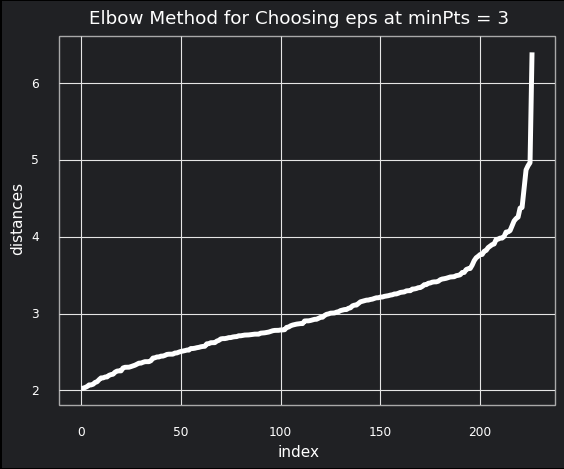

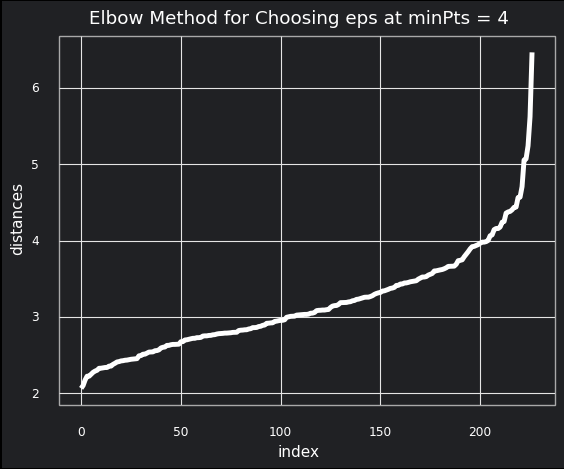

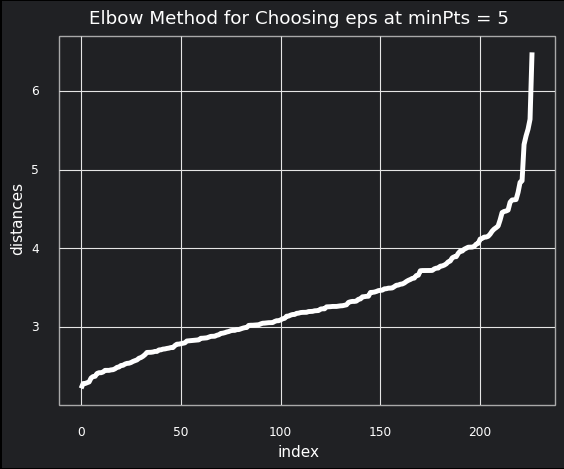

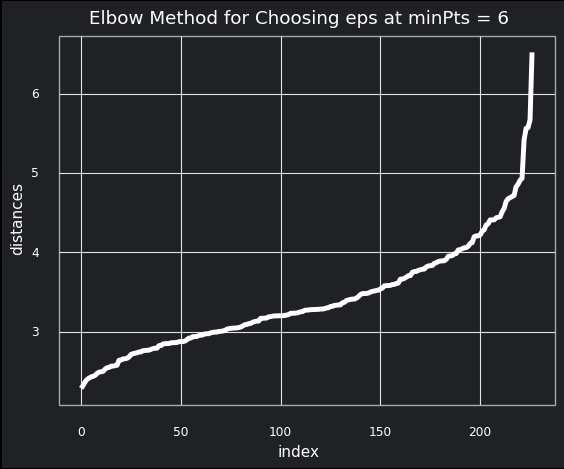

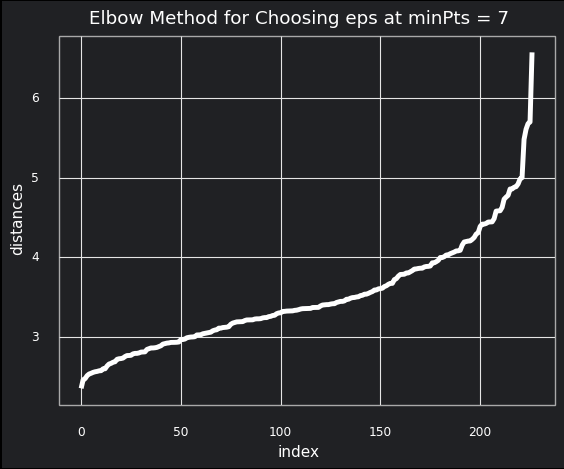

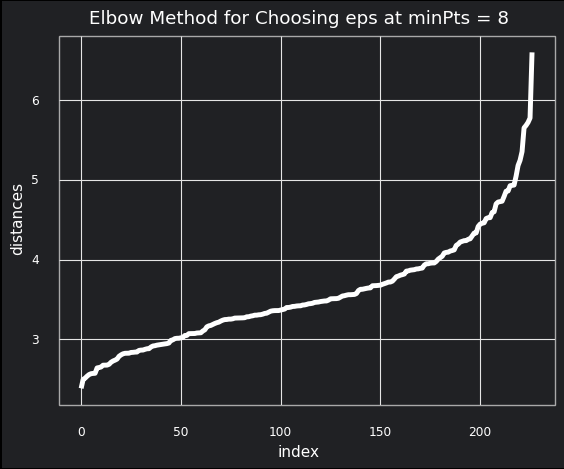

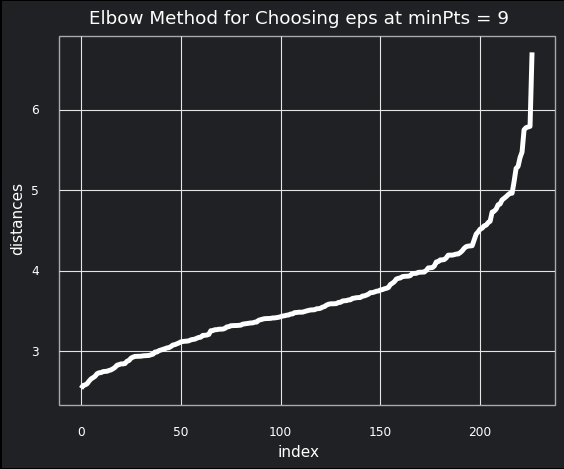

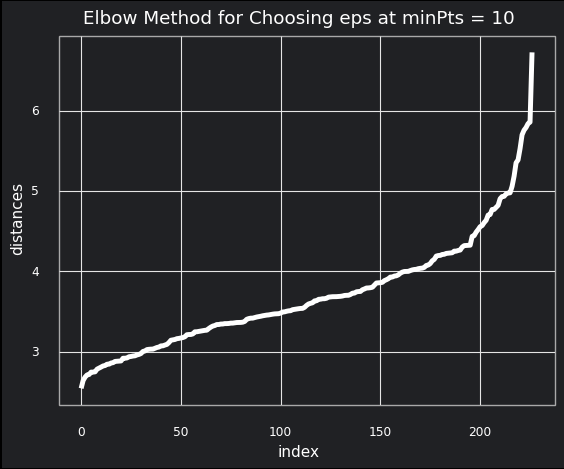

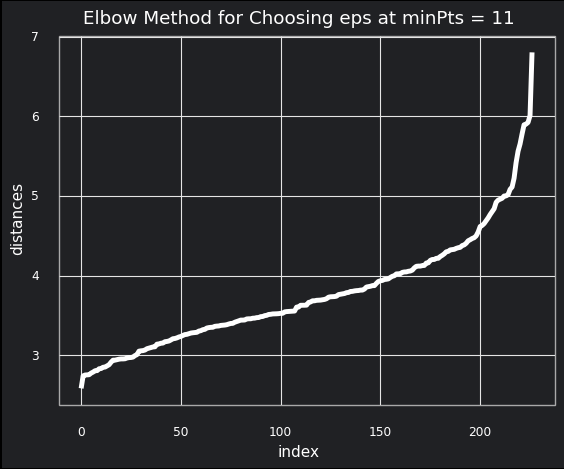

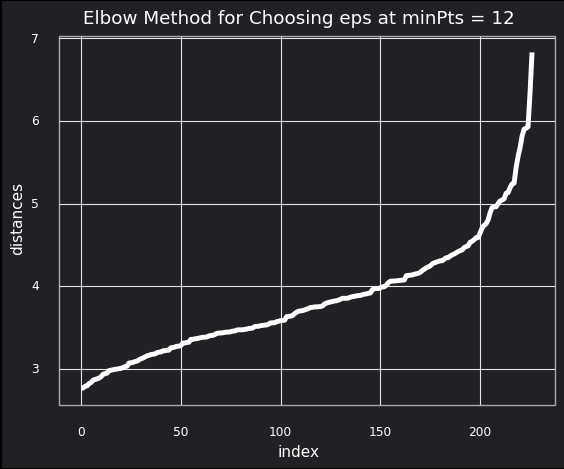

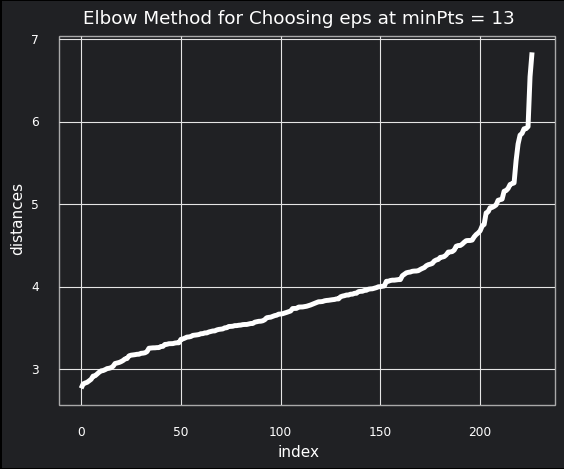

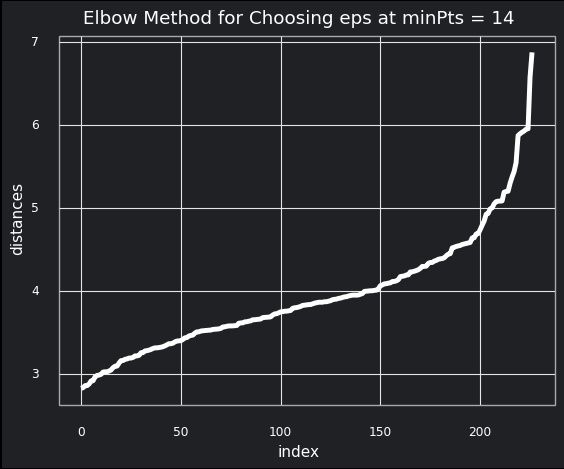

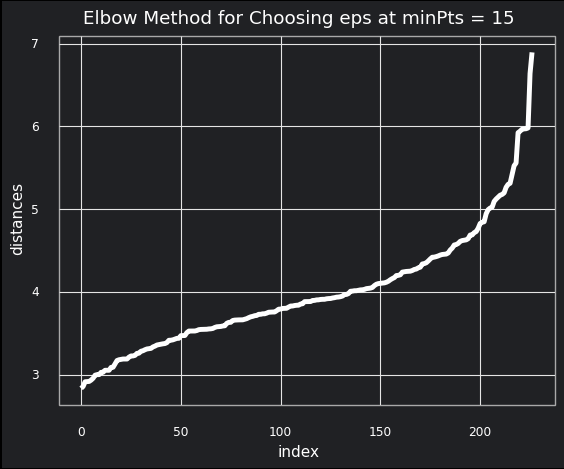

In [6]:
for plt in all_plots:
    print(plt)

In [7]:
eps = [3.6, 3.6, 3.8, 4, 4.2, 4.4, 4.5, 4.5, 4.6, 4.6, 4.7, 4.7, 4.8]

In [8]:
for pair_index in range(len(eps)):
    db = DBSCAN(eps = eps[pair_index], min_samples = mins[pair_index]).fit(x)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]
    
    print(f"At eps = {eps[pair_index]} and minPts = {mins[pair_index]} the clusters is {labsList}")
    print(f"Number of Noise points in dataset {sum(db.labels_ == -1)} of {len(df)}")
    print(np.array(np.unique(db.labels_, return_counts=True)))

At eps = 3.6 and minPts = 3 the clusters is ['Noise', 'Cluster 1', 'Cluster 2']
Number of Noise points in dataset 8 of 227
[[ -1   0   1]
 [  8 215   4]]
At eps = 3.6 and minPts = 4 the clusters is ['Noise', 'Cluster 1', 'Cluster 2']
Number of Noise points in dataset 8 of 227
[[ -1   0   1]
 [  8 215   4]]
At eps = 3.8 and minPts = 5 the clusters is ['Noise', 'Cluster 1']
Number of Noise points in dataset 11 of 227
[[ -1   0]
 [ 11 216]]
At eps = 4 and minPts = 6 the clusters is ['Noise', 'Cluster 1']
Number of Noise points in dataset 9 of 227
[[ -1   0]
 [  9 218]]
At eps = 4.2 and minPts = 7 the clusters is ['Noise', 'Cluster 1']
Number of Noise points in dataset 6 of 227
[[ -1   0]
 [  6 221]]
At eps = 4.4 and minPts = 8 the clusters is ['Noise', 'Cluster 1']
Number of Noise points in dataset 6 of 227
[[ -1   0]
 [  6 221]]
At eps = 4.5 and minPts = 9 the clusters is ['Noise', 'Cluster 1']
Number of Noise points in dataset 4 of 227
[[ -1   0]
 [  4 223]]
At eps = 4.5 and minPts = 10

## Choose the best minPts and eps pairs

In [9]:
db = DBSCAN(eps = 3.6, min_samples = 4).fit(x)

x["assignments"] = db.labels_

# grab only clustered data points
df_clustered = x[(x.assignments >= 0)]

print(silhouette_score(df_clustered.iloc[:, :-1], df_clustered["assignments"]))

# overall 
print(silhouette_score(x.iloc[:, :-1], x["assignments"]))

0.23356294016630127
0.20131056459762164


## Clustering after PCA

In [10]:
dfPCA = pd.read_csv("countries_of_the_world_after_PCA.csv")

# drop unknown columns
dfPCA = dfPCA.drop('Unnamed: 0', axis = 1)

#prepare the data
xPCA = dfPCA.copy()

In [11]:
xPCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-5.463514,1.271603,-0.571121,-2.484409,-3.077531,-0.040741,-3.385078,-0.222711,1.603560,-0.629349,0.043310,2.671238
1,0.457703,-1.227867,0.681466,0.190540,-0.045150,-2.649238,0.061214,0.575096,0.346111,0.607009,-0.169074,-0.600260
2,-2.044526,2.737342,1.374500,1.945873,-0.346965,-0.396031,-0.509722,-2.429320,0.443964,0.487395,0.552176,-0.711692
3,1.369194,-2.609735,-0.996838,2.227927,0.787986,-1.781308,1.364580,-2.146773,-1.859324,0.795198,0.721805,-1.381266
4,2.089586,1.726657,-0.984921,-1.108057,0.908780,-1.278246,-0.510063,-0.142555,1.147524,1.478083,0.137764,-0.321784


In [12]:
db = DBSCAN(eps = 3.6, min_samples = 4).fit(xPCA)

xPCA["assignments"] = db.labels_

# grab only clustered data points
df_clustered_PCA = xPCA[(xPCA.assignments >= 0)]

print(silhouette_score(df_clustered_PCA.iloc[:, :-1], df_clustered_PCA["assignments"]))

# overall 
print(silhouette_score(xPCA.iloc[:, :-1], xPCA["assignments"]))

0.24469815207811485
0.20462371751979763


## Compare between different Clustering algorithms after PCA

**Kmeans Clustering**

In [13]:
kmean = KMeans(n_clusters=3, init='k-means++')
kmean.fit(dfPCA)
labels = kmean.labels_
kmean_silhouette_score = silhouette_score(dfPCA, labels)

**Agglomerative Clustering**

In [14]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(dfPCA)
labels = hierarchical.labels_
hierarchical_silhouette_score = silhouette_score(dfPCA, labels)

**DBSCAN Clustering**

In [15]:
db = DBSCAN(eps = 3.6, min_samples = 4).fit(xPCA)

xPCA["assignments"] = db.labels_

# grab only clustered data points
df_clustered_PCA = xPCA[(xPCA.assignments >= 0)]

DBSCAN_silhouette_score = silhouette_score(df_clustered_PCA.iloc[:, :-1], df_clustered_PCA["assignments"])

## Print Silhouette Score for Clustering Algoritms

In [16]:
print(f"silhouette score for Kmeans clustering {kmean_silhouette_score}")
print(f"silhouette score for Agglomerative clustering {hierarchical_silhouette_score}")
print(f"silhouette score for DBSCAN clustering {DBSCAN_silhouette_score}")

silhouette score for Kmeans clustering 0.15837151379117903
silhouette score for Agglomerative clustering 0.17071479217676622
silhouette score for DBSCAN clustering 0.24469815207811485


In [18]:
print('DBSCAN is better than Kmeans and hierarchical clustering in this problem')

DBSCAN is better than Kmeans and hierarchical clustering in this problem


## DBSCAN is better than Kmeans and hierarchical clustering in this problem